In [1]:
! git clone https://github.com/Bhavay-Garg/Lung-Disease-Detection.git

Cloning into 'Lung-Disease-Detection'...
remote: Enumerating objects: 10108, done.
remote: Total 10108 (delta 0), reused 0 (delta 0), pack-reused 10108
Receiving objects: 100% (10108/10108), 1.97 GiB | 18.12 MiB/s, done.
Updating files: 100% (10095/10095), done.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib
data_dir = pathlib.Path("/content/Lung-Disease-Detection/Dataset/train")
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

4817


In [6]:
batch_size = 32
img_height = 250
img_width = 250

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6054 files belonging to 5 classes.
Using 4844 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6054 files belonging to 5 classes.
Using 1210 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1

In [15]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
152/152 [==============================] - 57s 92ms/step - loss: 0.9692 - accuracy: 0.6422 - val_loss: 0.6313 - val_accuracy: 0.7504
Epoch 2/25
152/152 [==============================] - 6s 38ms/step - loss: 0.5513 - accuracy: 0.7775 - val_loss: 0.5387 - val_accuracy: 0.7959
Epoch 3/25
152/152 [==============================] - 6s 36ms/step - loss: 0.4214 - accuracy: 0.8305 - val_loss: 0.5484 - val_accuracy: 0.7917
Epoch 4/25
152/152 [==============================] - 5s 36ms/step - loss: 0.3486 - accuracy: 0.8658 - val_loss: 0.5859 - val_accuracy: 0.7851
Epoch 5/25
152/152 [==============================] - 6s 37ms/step - loss: 0.2816 - accuracy: 0.8896 - val_loss: 0.5863 - val_accuracy: 0.7752
Epoch 6/25
152/152 [==============================] - 5s 36ms/step - loss: 0.2117 - accuracy: 0.9195 - val_loss: 0.6199 - val_accuracy: 0.7926
Epoch 7/25
152/152 [==============================] - 6s 37ms/step - loss: 0.1651 - accuracy: 0.9358 - val_loss: 0.8222 - val_accuracy: 0.774

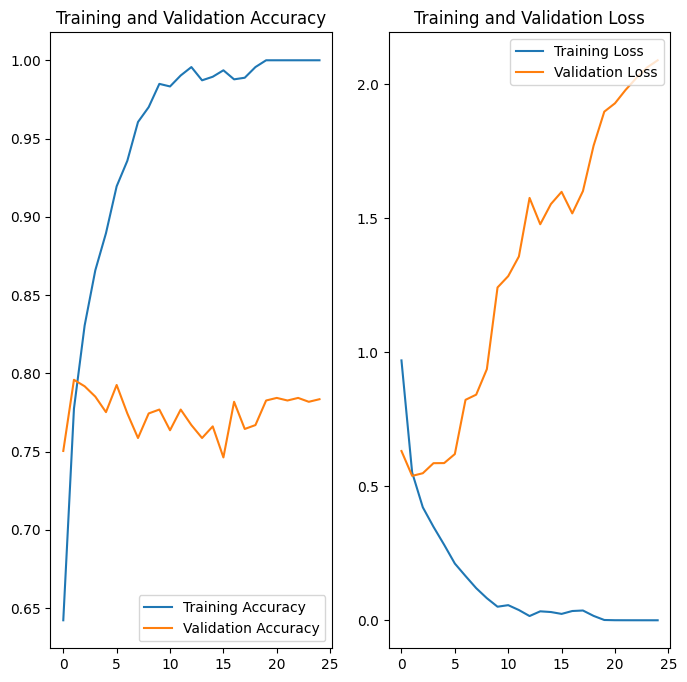

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.save("model1")

In [20]:
img = tf.keras.utils.load_img(
    "/content/Lung-Disease-Detection/Dataset/test/Bacterial Pneumonia/217.jpeg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Bacterial Pneumonia with a 99.98 percent confidence.


In [22]:
import shutil
shutil.make_archive('model1', 'zip', 'model1')

'/content/model1.zip'